<a href="https://colab.research.google.com/github/Rtniewi/cwiertniewicz-DataScience/blob/main/HW3/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

///*** Katrina Cwiertniewicz
//*** Introduction to Data Science IS1
//***10/2/2025
//*** Project 3
###The purpose of this assignment is to analyze the statistical factors influencing life expectancy with SQL queries and linear regression models using python.

# **Part 1 (SQL)**

**Delete all rows with population = 0. Perform further data cleaning for other attributes, as necessary.**

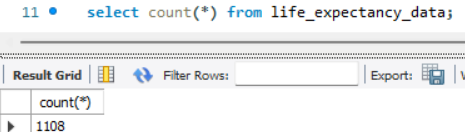

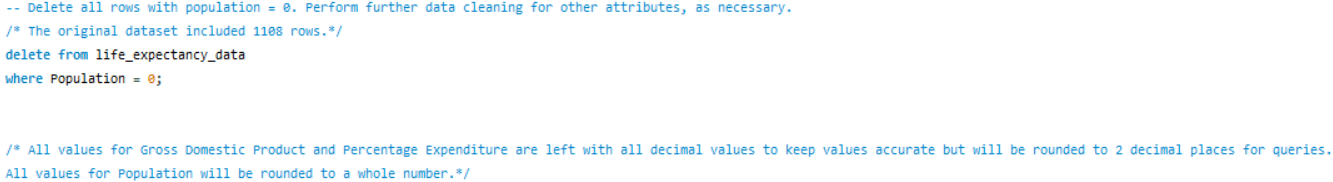

**Display total count of countries after data cleaning**

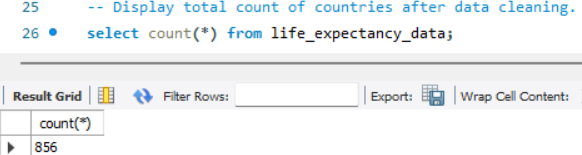

By removing Population = 0, a few countries were completely removed from the
data set including the United Arab Emirates, the United Kingdom of Great Britain and Northern Ireland, the United Republic of Tanzania, and the United States of America.

For Tuvalu, there was only one data point with a few missing values. Fiji is one of the closest islands to Tuvalu, so I added the average data from Fiji to Tuvalu. The same applies to the Syrian Arab Republic; Lebanon was used for missing values, and some other countries.

0.1 values were changed when it seemed to be an outlier when compared with its other data from that county. 0.1 values were left the same when all values from that country were 0.1, as they could be accurate data information.

Blue-highlighted values were changed as they were believed to be outliers when compared to the rest of the country's data.

**List of countries with the highest and lowest average mortality rates (years 2010-2015)**

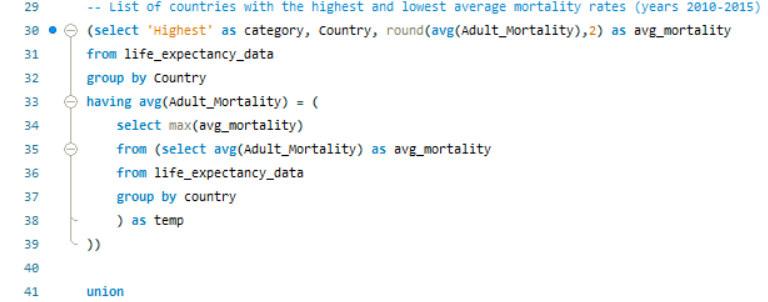

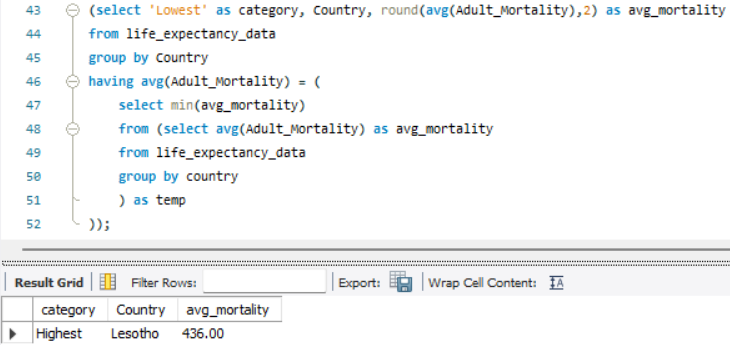

**List of countries with the highest and lowest average population (years 2010-2015)**

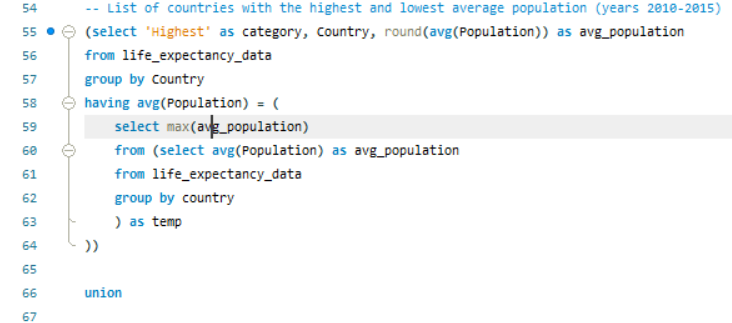

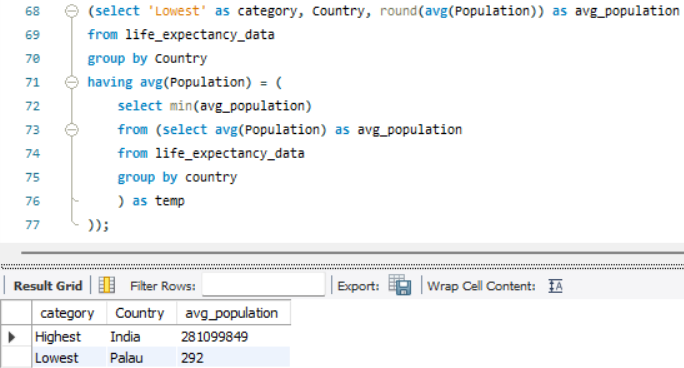

**List of countries with the highest and lowest average GDP (years 2010-2015)**

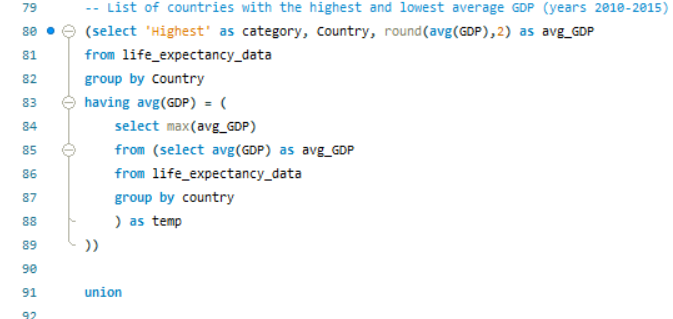

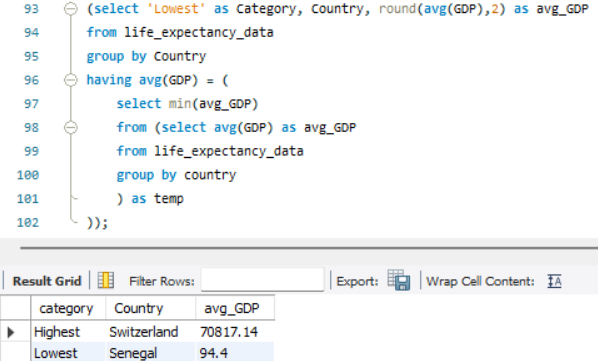

**List of countries with the highest and lowest average Schooling  (years 2010-2015)**

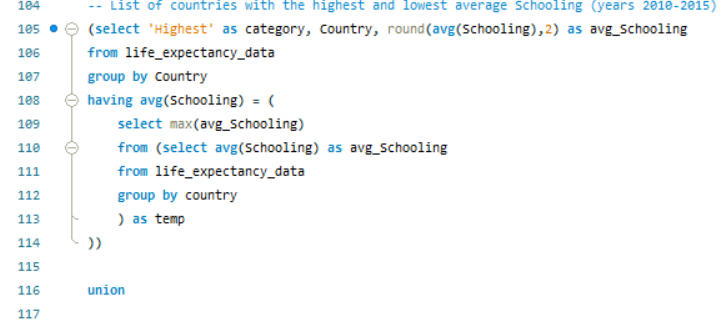

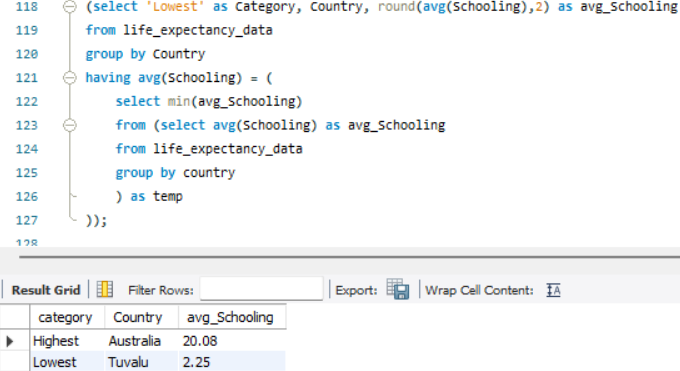

**Which countries have the highest and lowest average alcohol consumption (years 2010-2015)?**

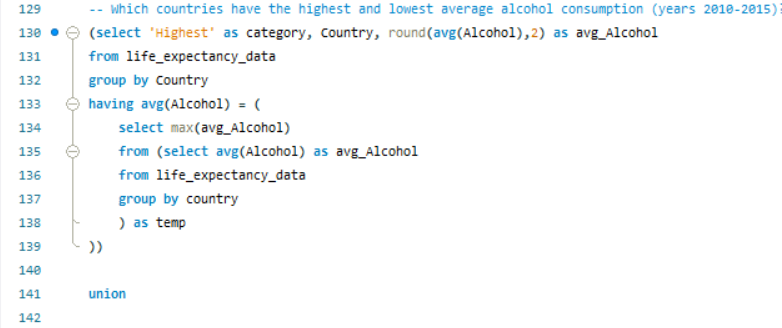

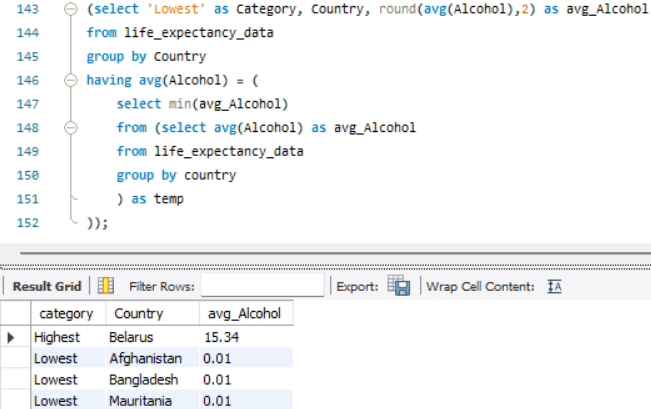

**Do densely populated countries tend to have lower life expectancy?**

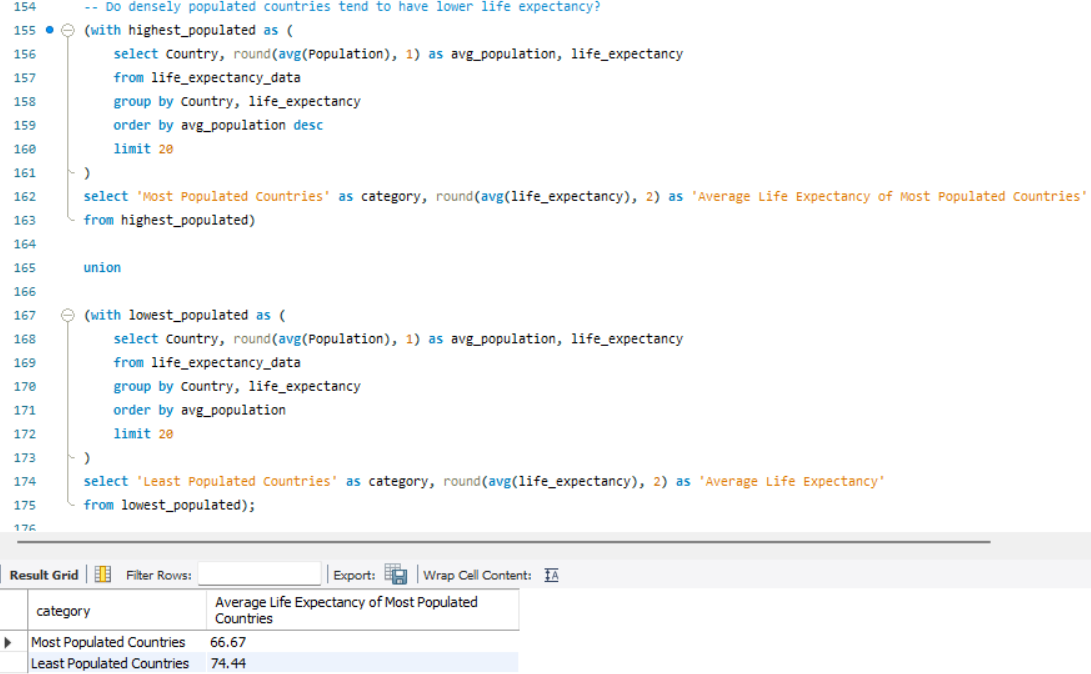

When comparing the top 20 Most and Least Populated countries, there is a slight difference in life expectancy averages. This shows that least populated countries have higher life expectancy. However, there are several factors that can contribute to lower life expectancy and this may not be a conclusive answer.

# **Part 2 (Python)**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Life_Expectancy_Cleaned_Final.csv to Life_Expectancy_Cleaned_Final.csv


In [27]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from numpy import cov
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lifeDF = pd.read_csv(io.BytesIO(uploaded['Life_Expectancy_Cleaned_Final.csv']))
print(lifeDF)

          Country  Year  Life_Expectancy  Adult_Mortality  Alcohol  \
0     Afghanistan  2010             58.8            279.0    0.010   
1     Afghanistan  2011             59.2            275.0    0.010   
2     Afghanistan  2012             59.5            272.0    0.010   
3     Afghanistan  2013             59.9            268.0    0.010   
4     Afghanistan  2014             59.9            271.0    0.010   
...           ...   ...              ...              ...      ...   
1103     Zimbabwe  2011             54.9            464.0    6.000   
1104     Zimbabwe  2012             56.6            429.0    6.090   
1105     Zimbabwe  2013             58.0            399.0    6.390   
1106     Zimbabwe  2014             59.2            371.0    6.500   
1107     Zimbabwe  2015             67.0            336.0    6.038   

      Percentage_Expenditure   BMI  Total_Expenditure         GDP  Population  \
0                  79.679367  16.7              9.200  553.328940   2883167.0 

In [5]:
lifeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 1108 non-null   object 
 1   Year                    1108 non-null   int64  
 2   Life_Expectancy         1108 non-null   float64
 3   Adult_Mortality         1108 non-null   float64
 4   Alcohol                 1108 non-null   float64
 5   Percentage_Expenditure  1108 non-null   float64
 6   BMI                     1108 non-null   float64
 7   Total_Expenditure       1108 non-null   float64
 8   GDP                     1108 non-null   float64
 9   Population              1108 non-null   float64
 10  Schooling               1108 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 95.3+ KB


In [6]:
print(tabulate(lifeDF, headers='keys', tablefmt='fancy_grid'))

╒══════╤══════════════════════════════════════════════════════╤════════╤═══════════════════╤═══════════════════╤═══════════╤══════════════════════════╤═════════════╤═════════════════════╤══════════════╤══════════════════╤═════════════╕
│      │ Country                                              │   Year │   Life_Expectancy │   Adult_Mortality │   Alcohol │   Percentage_Expenditure │         BMI │   Total_Expenditure │          GDP │       Population │   Schooling │
╞══════╪══════════════════════════════════════════════════════╪════════╪═══════════════════╪═══════════════════╪═══════════╪══════════════════════════╪═════════════╪═════════════════════╪══════════════╪══════════════════╪═════════════╡
│    0 │ Afghanistan                                          │   2010 │           58.8    │           279     │    0.01   │                 79.6794  │     16.7    │             9.2     │    553.329   │      2.88317e+06 │        9.2  │
├──────┼────────────────────────────────────────────────

**Filter data to remove where population = 0 or null.**

In [ ]:
lifeDF = lifeDF.dropna(subset=['Population'])
lifeDF = lifeDF[lifeDF['Population'] !=0]

In [11]:
lifeDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 856 entries, 0 to 1107
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 856 non-null    object 
 1   Year                    856 non-null    int64  
 2   Life_Expectancy         856 non-null    float64
 3   Adult_Mortality         856 non-null    float64
 4   Alcohol                 856 non-null    float64
 5   Percentage_Expenditure  856 non-null    float64
 6   BMI                     856 non-null    float64
 7   Total_Expenditure       856 non-null    float64
 8   GDP                     856 non-null    float64
 9   Population              856 non-null    float64
 10  Schooling               856 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 80.2+ KB


## **Answer the following questions by performing correlation analysis:**

**1) How does Adult mortality rates affect life expectancy?**

In [12]:
data1 = lifeDF['Adult_Mortality']
data2 = lifeDF['Life_Expectancy']


covariance = cov(data1, data2)

print(covariance)


[[12312.41332046  -738.55842831]
 [ -738.55842831    78.98106312]]


The covariance between the two variables is -738.56. It is negative, suggesting the direction of the variables. As Adult Moratlity goes up, Life Expectancy goes down.

To measure the strength and direction of Adult Mortaliy and Life Expectancy, Pearson's r correlation will be used.

In [ ]:
data1 = lifeDF['Adult_Mortality']
data2 = lifeDF['Life_Expectancy']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: -0.74739


-0.75 confirms Adult Mortality and Life Expectancy are negatively correlated. This suggests a high level of correlation as it is between 0.5 and 1.0.

**Scatter Plot of Adult Mortality vs Life Expectancy**

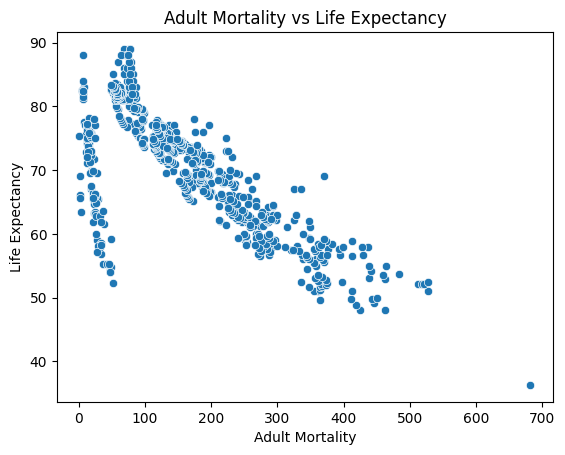

In [13]:
sns.scatterplot(data = lifeDF, x='Adult_Mortality', y='Life_Expectancy')
plt.title('Adult Mortality vs Life Expectancy')
plt.xlabel('Adult Mortality')
plt.ylabel('Life Expectancy')
plt.show()


**2) Does life expectancy have positive or negative correlation with eating habits, drinking alcohol, social factors, and economic factors?**


**Correlation of Life Expectancy and Alcohol (drinking alcohol)**

In [19]:
data1 = lifeDF['Life_Expectancy']
data2 = lifeDF['Alcohol']

corr, _ = pearsonr(data1, data2)
print('Life Expectancy and Alcohol Correlation: %.5f' % corr)

Life Expectancy and Alcohol Correlation: 0.45145


**Correlation of Life Expectancy and BMI (eating habits)**

In [21]:
data1 = lifeDF['Life_Expectancy']
data2 = lifeDF['BMI']

corr, _ = pearsonr(data1, data2)
print('Life Expectancy and BMI Correlation: %.5f' % corr)

Life Expectancy and BMI Correlation: -0.13610


**Correlation of Life Expectancy and Schooling/Population (social factors)**

In [16]:
data1 = lifeDF['Life_Expectancy']
data2 = lifeDF['Schooling']
data3 = lifeDF['Population']

corr, _ = pearsonr(data1, data2)
print('Life Expectancy and Schooling Correlation: %.5f' % corr)
corr, _ = pearsonr(data1, data3)
print('Life Expectancy and Population Correlation: %.5f' % corr)

Life Expectancy and Schooling Correlation: 0.80038
Life Expectancy and Population Correlation: -0.03337


**Correlation of Life Expectancy and Percentage Expenditure/Total Expenditure/GDP (Economic Factors)**

In [17]:
data1 = lifeDF['Life_Expectancy']
data2 = lifeDF['Percentage_Expenditure']
data3 = lifeDF['Total_Expenditure']
data4 = lifeDF['GDP']

corr, _ = pearsonr(data1, data2)
print('Life Expectancy and Percentage Expenditure Correlation: %.5f' % corr)
corr, _ = pearsonr(data1, data3)
print('Life Expectancy and Total Expenditure Correlation: %.5f' % corr)
corr, _ = pearsonr(data1, data4)
print('Life Expectancy and GDP Correlation: %.5f' % corr)

Life Expectancy and Percentage Expenditure Correlation: 0.48674
Life Expectancy and Total Expenditure Correlation: 0.26501
Life Expectancy and GDP Correlation: 0.46671


Schooling (0.80) was the highest correlation when compared with Life Expectancy. This suggests a high level of correlation, between 0.5 and 1.0. Percentage Expenditure(0.49), GDP(0.47), and Alcohol (0.45) were the next highest correlated variables. The weakest was the Population variable (-0.03).

**3) What is the impact of schooling on the lifespan of humans?**

In [22]:
data1 = lifeDF['Life_Expectancy']
data2 = lifeDF['Schooling']


covariance = cov(data1, data2)

print(covariance)


[[78.98106312 21.38635626]
 [21.38635626  9.03984962]]


The covariance between the two variable is 21.39. It is positive, suggesting the direction of the variables goes up. Life Expectancy goes up as the number of years of Schooling increases.

**Create and plot several linear regression models for life expectancy (as the
dependent variable) and the independent variables that had the highest correlation with life expectancy as found in your correlation analysis.**

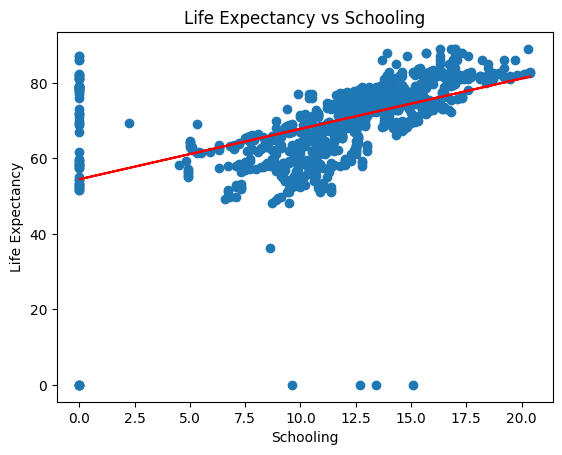

In [50]:
X1 = lifeDF['Schooling'].values.reshape(-1,1)
Y1 = lifeDF['Life_Expectancy'].values.reshape(-1,1)

model1 = LinearRegression()
model1.fit(X1,Y1)

Y1_pred = model1.predict(X1)

plt.scatter(X1, Y1)
plt.plot(X1, Y1_pred, color='red')
plt.title('Life Expectancy vs Schooling')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.show()

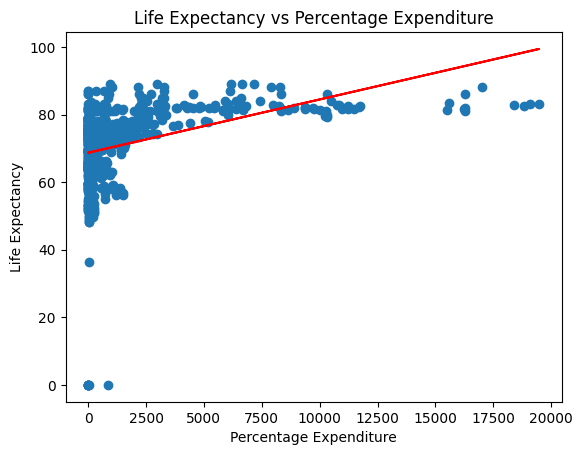

In [49]:
X2 = lifeDF['Percentage_Expenditure'].values.reshape(-1,1)
Y2 = lifeDF['Life_Expectancy'].values.reshape(-1,1)

model2 = LinearRegression()
model2.fit(X2,Y2)

Y2_pred = model2.predict(X2)

plt.scatter(X2, Y2)
plt.plot(X2, Y2_pred, color='red')
plt.title('Life Expectancy vs Percentage Expenditure')
plt.xlabel('Percentage Expenditure')
plt.ylabel('Life Expectancy')
plt.show()

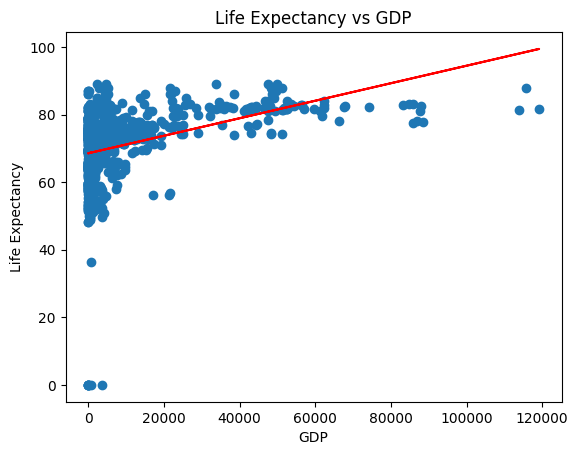

In [48]:
X3 = lifeDF['GDP'].values.reshape(-1,1)
Y3 = lifeDF['Life_Expectancy'].values.reshape(-1,1)

model3 = LinearRegression()
model3.fit(X3,Y3)

Y3_pred = model3.predict(X3)

plt.scatter(X3, Y3)
plt.plot(X3, Y3_pred, color='red')
plt.title('Life Expectancy vs GDP')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()

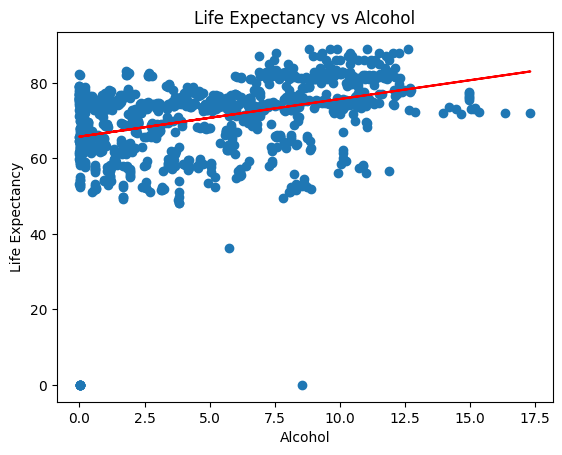

In [46]:
X4 = lifeDF['Alcohol'].values.reshape(-1,1)
Y4 = lifeDF['Life_Expectancy'].values.reshape(-1,1)

model4 = LinearRegression()
model4.fit(X4,Y4)

Y4_pred = model4.predict(X4)

plt.scatter(X4, Y4)
plt.plot(X4, Y4_pred, color='red')
plt.title('Life Expectancy vs Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Life Expectancy')
plt.show()

**Provide the equation of each model and compute their R2 and MSE values.**

# Schooling

In [51]:
# Line Equation
print("The slope: ", model1.coef_)
print("The intercept: ", model1.intercept_)

#Error Analysis
print("MSE: ", mean_squared_error(Y1, Y1_pred))
print("R2: ", r2_score(Y1, Y1_pred))

The slope:  [[1.33402001]]
The intercept:  [54.48136816]
MSE:  80.31156798714622
R2:  0.27174938901042034


# Percentage Expenditure

In [52]:
# Line Equation
print("The slope: ", model2.coef_)
print("The intercept: ", model2.intercept_)

#Error Analysis
print("MSE: ", mean_squared_error(Y2, Y2_pred))
print("R2: ", r2_score(Y2, Y2_pred))

The slope:  [[0.00157656]]
The intercept:  [68.69122388]
MSE:  93.8407226071659
R2:  0.14906948915117801


# GDP

In [53]:
# Line Equation
print("The slope: ", model3.coef_)
print("The intercept: ", model3.intercept_)

#Error Analysis
print("MSE: ", mean_squared_error(Y3, Y3_pred))
print("R2: ", r2_score(Y3, Y3_pred))

The slope:  [[0.00025916]]
The intercept:  [68.54943755]
MSE:  95.11463240883172
R2:  0.1375179080444907


# Alcohol

In [54]:
# Line Equation
print("The slope: ", model4.coef_)
print("The intercept: ", model4.intercept_)

#Error Analysis
print("MSE: ", mean_squared_error(Y4, Y4_pred))
print("R2: ", r2_score(Y4, Y4_pred))

The slope:  [[0.99745258]]
The intercept:  [65.76487518]
MSE:  94.57359193884069
R2:  0.1424239640799566


**Summarize your findings and explain which model performs the best.**

The model schooling performs the best. It has the lowest MSE score meaning its regression line is the closest to the set of data points. It also has the highest R2 value of .27. This value is still not very high as about 30% of the variance in Life Expectancy is explained by Schooling. The closer the R2 is to 1 the better. Overall, these four models show slight correlation to the data compared to other variables such as BMI and Population. I believe this makes sense because a combination of many factors may result in a decrease in life expectancy.